# Practica 2

APUNTES DE CLASE
- si hay muchas clases dejarlo en dos para que el perceptron lo tome, solo clasifica entre 2 clases
- Podria pasar que si el perceptron devuelve 0, no es falso
- check tipo de encoding, formato ,; tab (fijarse en el ejmplo)
- display interpreta el tippo de dato

In [77]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook: # maquina virtual colab
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR  = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR    = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
    MODELOS_DIR  = '/content/drive/MyDrive/Colab Notebooks/MODELOS/'    # carpeta donde se encuentran los modelos
    ARCHIVOS_DIR = '/content/drive/MyDrive/Colab Notebooks/ARCHIVOS/'   # carpeta recuperar o copiar archivos
else: # maquina local ipython
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR  = '../Fuentes'     # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR    = '../Datos/'      # carpeta donde se encuentran los datasets
    MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
    ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

# Ejercicio 2

El archivo Globos.csv contiene el registro de 16 intentos para inflar globos. Los atributos registrados fueron 
el color del globo, el tamaño, si se estira o no y si la acción de inflarlo fue realizada por un adulto o por un 
niño. En cada registro se anotó si el globo pudo ser inflado o no.



In [96]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos


nombre_archivo = DATOS_DIR + 'Globos.csv' # archivo de hojas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])

# visualiza el dataframe
# print(df)
display(df)

,Color,Tamanio,Se_estira?,Edad,Inflado?
0,Amarillo,Chico,Si,Adulto,Si
1,Amarillo,Chico,Si,Niño,Si
2,Amarillo,Chico,No,Adulto,No
3,Amarillo,Chico,No,Niño,No
4,Amarillo,Grande,Si,Adulto,Si
5,Amarillo,Grande,Si,Niño,Si
6,Amarillo,Mediano,No,Adulto,No
7,Amarillo,Mediano,No,Niño,No
8,Rojo,Chico,Si,Adulto,Si
9,Rojo,Chico,Si,Niño,No


Numerice los atributos de la siguiente forma: 
- Color = 1 si es rojo y 0 si es amarillo
- SeEstira? = 1 para Si y 0 para No
- Edad = 1 si es adulto y 0 si es Nene
- Tamanio = 0 si es Chico, 0.5 si es mediano y 1 si es grande

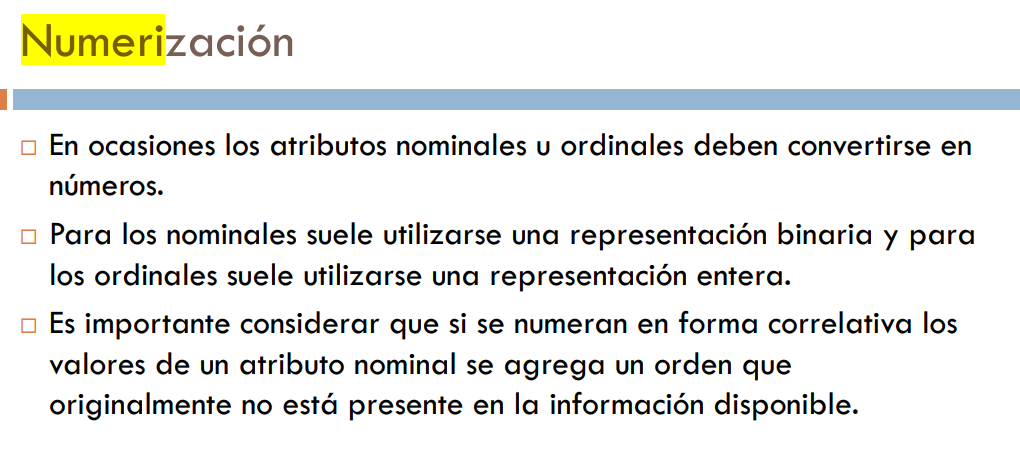

In [97]:
mapeo = {
    'Color' : {'Rojo':1, 'Amarillo':0},
    'Se_estira?' : {'Si': 1, 'No': 0},
    'Edad' : {'Adulto': 1, 'Niño': 0},
    'Tamanio' : {'Chico' : 0, 'Mediano' : 0.5, 'Grande': 1}
    }

df.replace(mapeo, inplace=True)
df

,Color,Tamanio,Se_estira?,Edad,Inflado?
0,0,0.0,1,1,Si
1,0,0.0,1,0,Si
2,0,0.0,0,1,No
3,0,0.0,0,0,No
4,0,1.0,1,1,Si
5,0,1.0,1,0,Si
6,0,0.5,0,1,No
7,0,0.5,0,0,No
8,1,0.0,1,1,Si
9,1,0.0,1,0,No


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Color       16 non-null     int64  
 1   Tamanio     16 non-null     float64
 2   Se_estira?  16 non-null     int64  
 3   Edad        16 non-null     int64  
 4   Inflado?    16 non-null     object 
dtypes: float64(1), int64(3), object(1)
memory usage: 772.0+ bytes


In [99]:
df[['Color', 'Se_estira?', 'Edad']] = df[['Color', 'Se_estira?', 'Edad']].astype(float)


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Color       16 non-null     float64
 1   Tamanio     16 non-null     float64
 2   Se_estira?  16 non-null     float64
 3   Edad        16 non-null     float64
 4   Inflado?    16 non-null     object 
dtypes: float64(4), object(1)
memory usage: 772.0+ bytes


- a. Indique cuáles de los siguientes perceptrones pueden clasificar correctamente todos los ejemplos normalizados del archivo Globos.csv
- b. Indique cuál de los 5 perceptrones del inciso anterior presenta el peor desempeño, es decir, cuál es el 
que clasifica la menor cantidad de ejemplos correctamente.


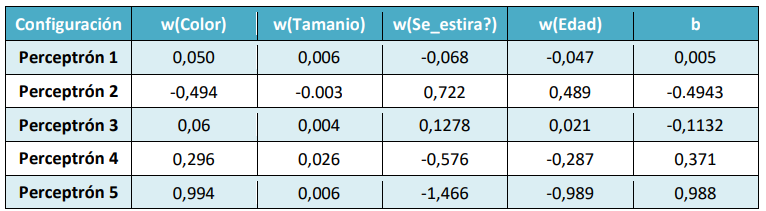

In [101]:
Perceptron1 = [0.050, 0.006, -0.068, -0.047, 0.005]
Perceptron1 = [float(valor) for valor in Perceptron1]

In [102]:
clasificaBien = True
for fila in range (len(df)):
    fila = df.iloc[fila]
    real = fila[-1]
    
    #calculo la salida del perceptron
    y = (fila[0] * Perceptron1[0]) + (fila[1] * Perceptron1[1]) + (fila[2] * Perceptron1[2]) + (fila[3] * Perceptron1[3])  + Perceptron1[4]

    #calculo la salida
    salida = 1 if y>=0 else 0

    if not ((salida == 1) and (real == 'Si')):
        clasificaBien = False
        break

if clasificaBien:
    print ('El perceptron funciona bien en todos los casos')
else:
    print('FUNCIN MAL')

FUNCIN MAL


In [107]:
def probar_Perceptron (df, Perceptron):
    clasificaBien = True
    cant=0
    for fila in range (len(df)):
        fila = df.iloc[fila]
        real = fila[-1]
        
        #calculo la salida del perceptron
        y = (fila['Color'] * Perceptron[0]) + (fila['Tamanio'] * Perceptron[1]) + (fila['Se_estira?'] * Perceptron[2]) + (fila['Edad'] * Perceptron[3])  + Perceptron[4]

        #calculo la salida
        salida = 1 if y>=0 else 0

        etiqueta_real = 1 if real == 'Si' else 0
        if salida != etiqueta_real:
            clasificaBien = False
            cant=cant+1 #cuento la cantidad de veces que se equivoca
            break
        
    return clasificaBien,cant

In [109]:
Perceptron1 = [0.050, 0.006, -0.068, -0.047, 0.005]
Perceptron2 = [-0.494, -0.003, 0.722, 0.489, -0.4943]
Perceptron3 = [0.06, 0.004, 0.1278, 0.021, -0.1132]
Perceptron4 = [0.296, 0.026, -0.576, -0.287, 0.371]
Perceptron5 =  [0.994, 0.006, -1.466, -0.989, 0.988]

resultado1,cant1 = probar_Perceptron(df, Perceptron1)
resultado2,cant2 = probar_Perceptron(df, Perceptron2)
resultado3,cant3 = probar_Perceptron(df, Perceptron3)
resultado4,cant4 = probar_Perceptron(df, Perceptron4)
resultado5,cant5 = probar_Perceptron(df, Perceptron5)

print('Perceptron 1:', 'Funciona bien en todos los casos' if resultado1 else 'FUNCIONA MAL')
print('Perceptron 2:', 'Funciona bien en todos los casos' if resultado2 else 'FUNCIONA MAL')
print('Perceptron 3:', 'Funciona bien en todos los casos' if resultado3 else 'FUNCIONA MAL')
print('Perceptron 4:', 'Funciona bien en todos los casos' if resultado4 else 'FUNCIONA MAL')
print('Perceptron 5:', 'Funciona bien en todos los casos' if resultado5 else 'FUNCIONA MAL')

Perceptron 1: FUNCIONA MAL
Perceptron 2: Funciona bien en todos los casos
Perceptron 3: FUNCIONA MAL
Perceptron 4: FUNCIONA MAL
Perceptron 5: FUNCIONA MAL


In [105]:
valores = {
    'Perceptron1': cant1,
    'Perceptron2': cant2,
    'Perceptron3': cant3,
    'Perceptron4': cant4,
    'Perceptron5': cant5
}

peor_perceptron = max (valores, key=valores.get)
valor_min =valores[peor_perceptron]

print(f'El perceptron con el menor desempenio es el {peor_perceptron} con {valor_min} fallos')

El perceptron con el menor desempenio es el Perceptron1 con 1 fallos


In [106]:
valores

{'Perceptron1': 1,
 'Perceptron2': 0,
 'Perceptron3': 1,
 'Perceptron4': 1,
 'Perceptron5': 1}